<h1>Libraries import</h1>

In [165]:
import numpy as np
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split, LeaveOneOut, LeavePOut
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

<h1>Mean, Median, Mode</h1>

* Mean - The average value
* Median - The mid point value
* Mode - The most common value

In [2]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86] #dane

In [5]:
print("Mean: ", np.mean(speed))

Mean:  89.76923076923077


In [6]:
print("Median: ", np.median(speed))

Median:  87.0


In [9]:
print("Mode", stats.mode(speed))

Mode ModeResult(mode=86, count=3)


<h1>Standard deviation, Variance, Percentiles</h1>

Standard deviation is a number that describes how spread out the values are.
<br>A low standard deviation means that most of the numbers are close to the mean (average) value.
<br>A high standard deviation means that the values are spread out over a wider range.
<br>For example if the mean of dataset is 70 and the standard devition is 37 means most of values are in range 70 ± 37

In [10]:
print("Standard deviation: ", np.std(speed))

Standard deviation:  9.258292301032677


If you take the square root of the variance, you get the standard deviation.
<br>To calculate the variance you have to do as follows:
1. Find the mean
2. For each value: find the difference from the mean.
3. For each difference: find the square value.
4. The variance is the average number of these squared differences.

In [11]:
print("Variance: ", np.var(speed))

Variance:  85.71597633136093


Percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than.

In [12]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

In [13]:
print("75 percentile: ", np.percentile(ages, 75))

75 percentile:  43.0


It means that 75% of the ages are lower or equal to 43.

<h1>Data distribution</h1>

<p style='color:#DB1616'>To create a dataset we can use numpy.random.uniform (or other distributions from numpy or scipy) and reshape to make a multidimentional array instead of 2D.
</p>

In [28]:
x = np.random.uniform(0.0, 5.0, 24)
print(x)
print(x.reshape(-1,4), "\n")
print(x.reshape(4,-1), "\n")
print(x.reshape(4,2,-1), "\n")
print(x.reshape(2,-1,2,2), "\n")

[2.29119607 2.71600821 3.09959225 4.87961483 3.3481336  4.60842502
 0.70418288 3.12449094 1.26227585 0.93640964 4.44191851 2.94710227
 0.11488943 4.14402424 2.40352472 4.37885207 0.69937021 0.0719074
 0.13684365 0.41895506 3.47274023 1.66187511 0.49544645 3.14310954]
[[2.29119607 2.71600821 3.09959225 4.87961483]
 [3.3481336  4.60842502 0.70418288 3.12449094]
 [1.26227585 0.93640964 4.44191851 2.94710227]
 [0.11488943 4.14402424 2.40352472 4.37885207]
 [0.69937021 0.0719074  0.13684365 0.41895506]
 [3.47274023 1.66187511 0.49544645 3.14310954]] 

[[2.29119607 2.71600821 3.09959225 4.87961483 3.3481336  4.60842502]
 [0.70418288 3.12449094 1.26227585 0.93640964 4.44191851 2.94710227]
 [0.11488943 4.14402424 2.40352472 4.37885207 0.69937021 0.0719074 ]
 [0.13684365 0.41895506 3.47274023 1.66187511 0.49544645 3.14310954]] 

[[[2.29119607 2.71600821 3.09959225]
  [4.87961483 3.3481336  4.60842502]]

 [[0.70418288 3.12449094 1.26227585]
  [0.93640964 4.44191851 2.94710227]]

 [[0.11488943 4.

To visualize data distribution we can use histogram.

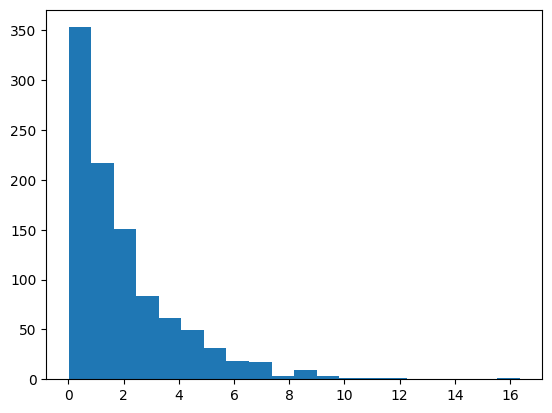

In [44]:
rng = np.random.RandomState(42) #reproducibility
x = rng.exponential(scale=2, size=1000) #size = shape of an array
plt.hist(x, 20)
plt.show()

<h1>Normal data distribution</h1>

In [45]:
rng = np.random.RandomState(42) #reproducibility
x = rng.normal(loc=5.0,scale=1.0,size=10000) #loc=mean, scale=deviation

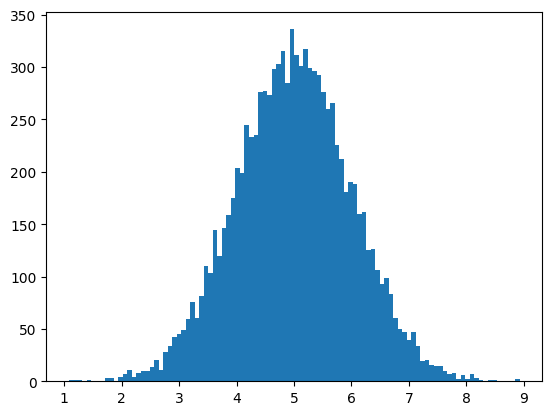

In [46]:
plt.hist(x, 100)
plt.show()

A normal distribution graph is also known as the bell curve because of it's characteristic shape of a bell.

<h1>Scatter plot</h1>

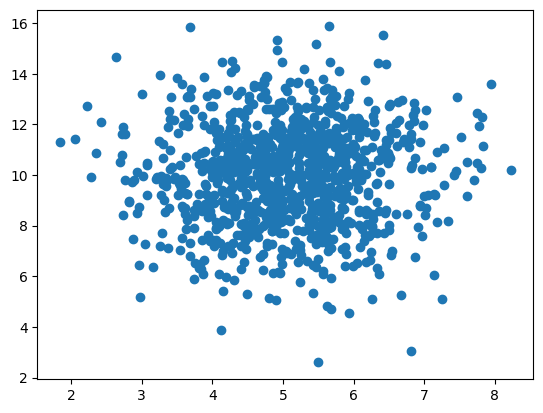

In [49]:
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

<h1>R-Squared</h1>

It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.
<br>The relationship is measured with a value called the r-squared.
<br>The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.
<br>Python and the Sklearn module will compute this value for you, all you have to do is feed it with the x and y arrays:

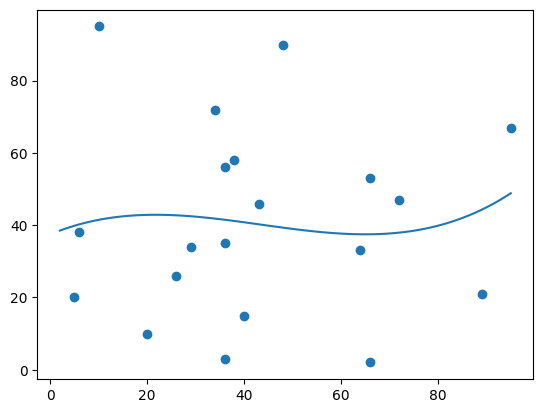

R2:  0.009952707566680652


In [55]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

print("R2: ", r2_score(y, mymodel(x)))

The R2 score is very low.

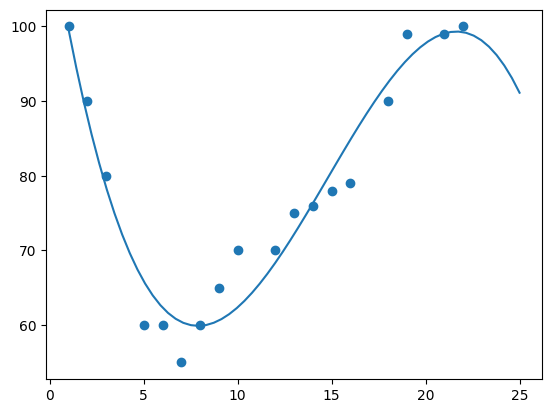

R2:  0.9432150416451026


In [61]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 25, 60)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

print("R2: ", r2_score(y, mymodel(x)))

Here the R2 score is high which means the regression is a good representation of data.

<h1>Scale features</h1>

In [64]:
#scale = StandardScaler()

#df = pandas.read_csv("data.csv")

#X = df[['Weight', 'Volume']]
#y = df['CO2']

#scaledX = scale.fit_transform(X)

#regr = linear_model.LinearRegression()
#regr.fit(scaledX, y)

#scaled = scale.transform([[2300, 1.3]])

#predictedCO2 = regr.predict([scaled[0]])
#print(predictedCO2)

<h1>Confusion Matrix</h1>

It is a table that is used in classification problems to assess where errors in the model were made.The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.

In [83]:
rng = np.random.RandomState(42)
actual = rng.binomial(1, 0.9, size = 1000)
predicted = rng.binomial(1, 0.9, size = 1000)

In [84]:
confusion_matrix = confusion_matrix(actual, predicted)

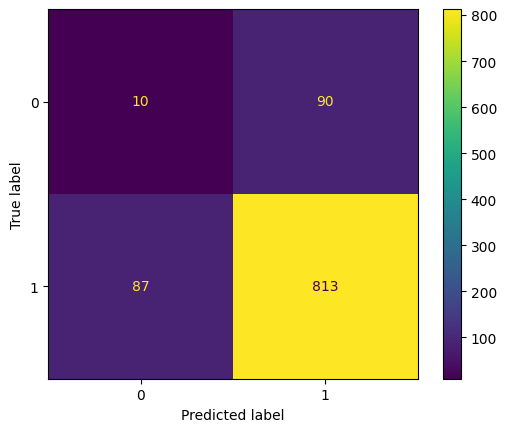

In [85]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                    display_labels = [0, 1])
cm_display.plot()
plt.show()

<h1>Accuracy, Precision, Sensitivity (Recall), Specificity and F-score</h1>

Acccuracy = (TP + TN)/Total

In [91]:
print("Accuracy: ", accuracy_score(actual, predicted))

Accuracy:  0.823


Precision = TP/(TP + FP)

In [93]:
print("Precision: ", precision_score(actual, predicted))

Precision:  0.9003322259136213


Sensitivity (Recall) = TP/(TP + FN)

In [94]:
print("Recall: ", recall_score(actual, predicted))

Recall:  0.9033333333333333


Specificity = TN/(TN + FP)

In [95]:
print("Specificity: ", recall_score(actual, predicted, pos_label=0))

Specificity:  0.1


F-score = 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))

In [96]:
print("F-score: ", f1_score(actual, predicted))

F-score:  0.9018302828618968


<h1>Hierarchical clustering</h1>

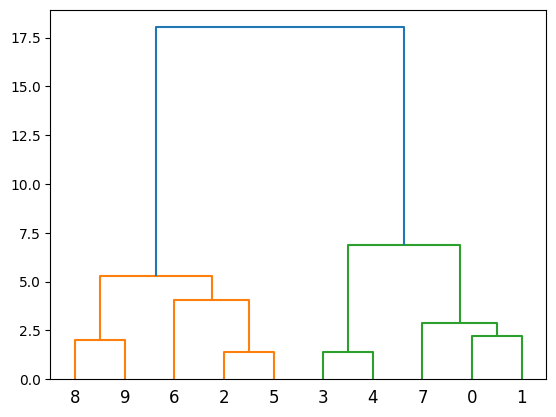

In [98]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

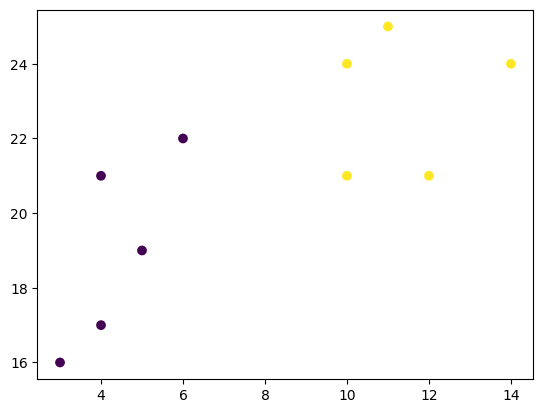

In [102]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', 
                                               linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

<h1>Logistic Regression</h1>

Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.
<br>In the simplest case there are two outcomes, which is called binomial, an example of which is predicting if a tumor is malignant or benign. Other cases have more than two outcomes to classify, in this case it is called multinomial. A common example for multinomial logistic regression would be predicting the class of an iris flower between 3 different species.

In [107]:
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 
              3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

model = linear_model.LogisticRegression()
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


wow

In [110]:
print(model.predict(np.array([3.46]).reshape(-1,1)))

[0]


In [111]:
log_odds = model.coef_
odds = np.exp(log_odds)

print(odds)

[[4.03557295]]


This tells us that as the size of a tumor increases by 1mm the odds of it being a cancerous tumor increases by 4x.

Create a function that uses the model's coefficient and intercept values to return a new value. This new value represents probability that the given observation is a tumor:

<h1>Grid search</h1>

One method is to try out different values and then pick the value that gives the best score. This technique is known as a grid search. If we had to select the values for two or more parameters, we would evaluate all combinations of the sets of values thus forming a grid of values.

First let's see what kind of results we can generate without a grid search using only the base parameters.

In [114]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

In [119]:
logit = LogisticRegression(max_iter = 10000)
logit.fit(X,y)
print(logit.score(X,y))

0.9733333333333334


In [121]:
C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


<h1>Categorical data</h1>

One hot encoding - a column representing each group in the category. For each column, the values will be 1 or 0 where 1 represents the inclusion of the group and 0 represents the exclusion.

In [123]:
#cars = pd.get_dummies(cars[['Car']]) 
#- makes 0/1 columns of Car column categories
#X = pandas.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
#joins new columns to dataFrame 

It is not necessary to create one column for each group in your category. The information can be retained using 1 column less than the number of groups you have.
<br>To do this, we can use the same function that we used for one hot encoding, get_dummies, and then drop one of the columns. There is an argument, drop_first, which allows us to exclude the first column from the resulting table.

In [124]:
#dummies = pd.get_dummies(colors, drop_first=True)

<h1>K-means</h1>

First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.
<br>K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "elbow" and is a good estimate for the best value for K based on our data.

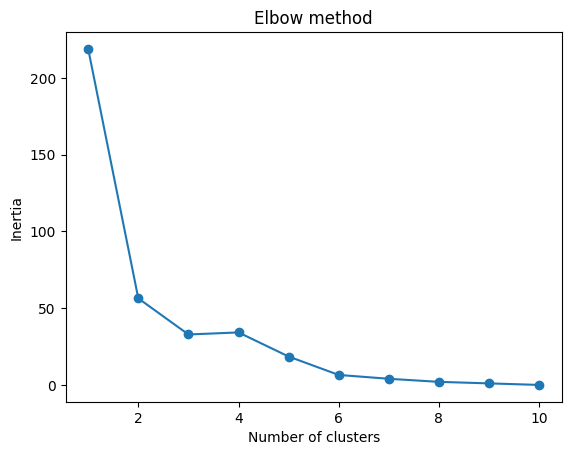

In [127]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow method shows that 2 is a good value for K.

<h1>Bootstrap aggregation ???</h1>

<h1>Cross validation</h1>

In [143]:
X, y = datasets.load_iris(return_X_y=True)

K-Fold - The training data used in the model is split, into k number of smaller sets, to be used to validate the model. The model is then trained on k-1 folds of training set. The remaining fold is then used as a validation set to evaluate the model.

In [149]:
clf = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 4)

scores = cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         0.94736842 0.89189189 0.7027027 ]
Average CV Score:  0.8854907539118064
Number of CV Scores used in Average:  4


Stratified K-Fold - In cases where classes are imbalanced we need a way to account for the imbalance in both the train and validation sets. To do so we can stratify the target classes, meaning that both sets will have an equal proportion of all classes.

In [151]:
sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5


Leave-One-Out (LOO) - Instead of selecting the number of splits in the training data set like k-fold LeaveOneOut, utilize 1 observation to validate and n-1 observations to train. This method is an exaustive technique.

In [153]:
loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


Leave-P-Out (LPO) - Leave-P-Out is simply a nuanced diffence to the Leave-One-Out idea, in that we can select the number of p to use in our validation set.

In [156]:
lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv = lpo)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9382997762863534
Number of CV Scores used in Average:  11175


Shuffle Split - Unlike KFold, ShuffleSplit leaves out a percentage of the data, not to be used in the train or validation sets. To do so we must decide what the train and test sizes are, as well as the number of splits.

In [158]:
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X, y, cv = ss)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93333333 0.91111111 0.93333333 0.91111111 0.88888889]
Average CV Score:  0.9155555555555555
Number of CV Scores used in Average:  5


<h1>AUC-ROC Curve</h1>

AUC is the area under the receiver operating characteristic (ROC) curve. The Reciever operating characteristic curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds. The thresholds are different probability cutoffs that separate the two classes in binary classification. It uses probability to tell us how well a model separates the classes.

Text(0, 0.5, 'True Positive Rate')

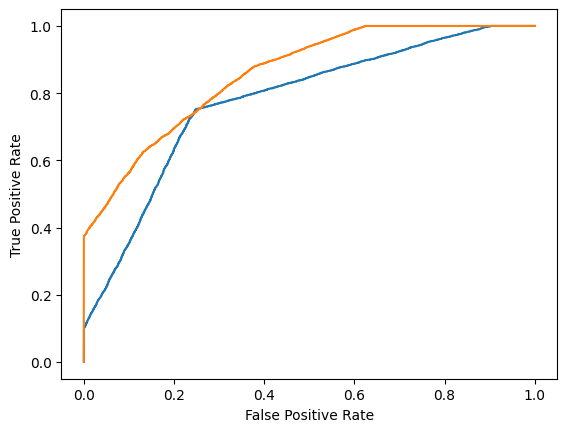

In [164]:
n = 10000
y = np.array([0] * n + [1] * n)
#
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

fpr, tpr, thresholds = roc_curve(y, y_prob_1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h1>K-nearest neighbors</h1>

KNN - simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation. It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm.
<br>Larger values of K are often more robust to outliers and produce more stable decision boundaries than very small values (K=3 would be better than K=1, which might produce undesirable results.

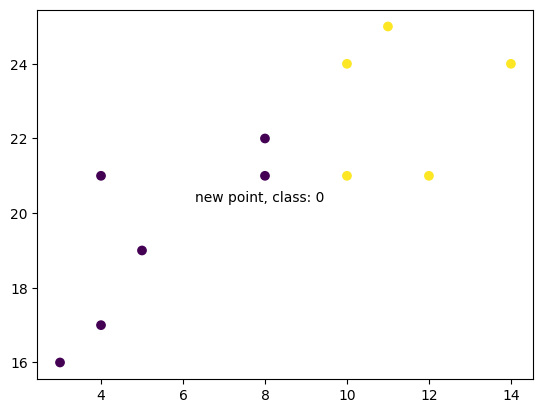

In [168]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1) #1 neighbor
knn.fit(data, classes)

new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

U CAN ADD TEXT OH F-

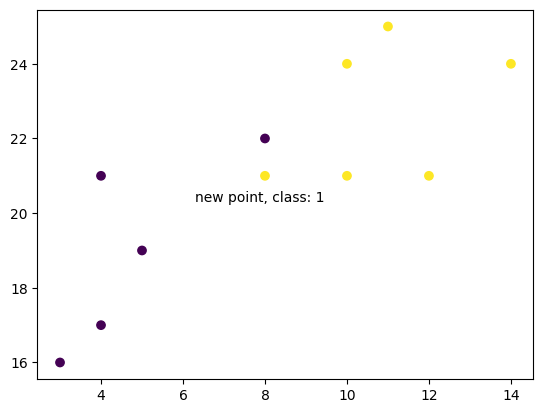

In [169]:
knn = KNeighborsClassifier(n_neighbors=5) #now 5 neighbors

knn.fit(data, classes)
prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()